In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

pd.set_option('display.max_colwidth', None)

In [10]:
data_path = '../../data/emotion-emotion_69k.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Customer :I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.\nAgent :","Was this a friend you were in love with, or just a best friend?",NaN,NaN
1,1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :This was a best friend. I miss her.\nAgent :,Where has she gone?,NaN,NaN
2,2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of an argument?,NaN,NaN
3,3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Customer :Was this a friend you were in love with, or just a best friend?\nAgent :",This was a best friend. I miss her.,NaN,NaN
4,4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN


In [11]:
df = df[['Situation', 'emotion', 'empathetic_dialogues', 'labels']]
df.head()

,Situation,emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Customer :I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.\nAgent :","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :This was a best friend. I miss her.\nAgent :,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of an argument?
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Customer :Was this a friend you were in love with, or just a best friend?\nAgent :",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.


In [12]:
df['empathetic_dialogues'] = df['empathetic_dialogues'].str.replace(r'^Customer :|Agent :$', '', regex=True).str.strip()
df.dropna(inplace=True)
df.head(10)

,Situation,emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,This was a best friend. I miss her.,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,We no longer talk.,Oh was this something that happened because of an argument?
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,"Was this a friend you were in love with, or just a best friend?",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",sentimental,Where has she gone?,We no longer talk.
5,i used to scare for darkness,afraid,it feels like hitting to blank wall when i see the darkness,Oh ya? I don't really see how
6,i used to scare for darkness,afraid,dont you feel so.. its a wonder,I do actually hit blank walls a lot of times but i get by
7,i used to scare for darkness,afraid,i virtually thought so.. and i used to get sweatings,Wait what are sweatings
8,i used to scare for darkness,afraid,Oh ya? I don't really see how,dont you feel so.. its a wonder
9,i used to scare for darkness,afraid,I do actually hit blank walls a lot of times but i get by,i virtually thought so.. and i used to get sweatings


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



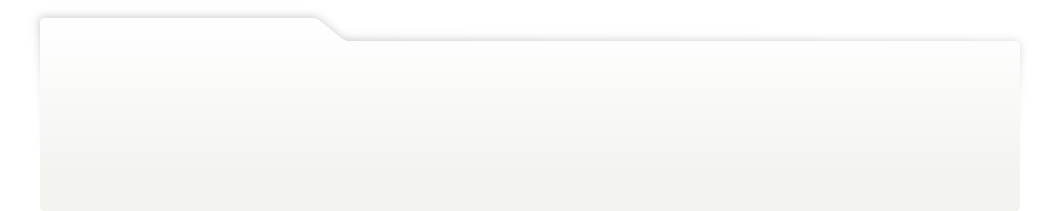
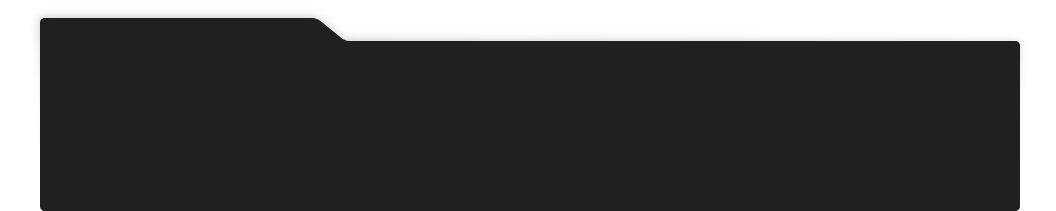
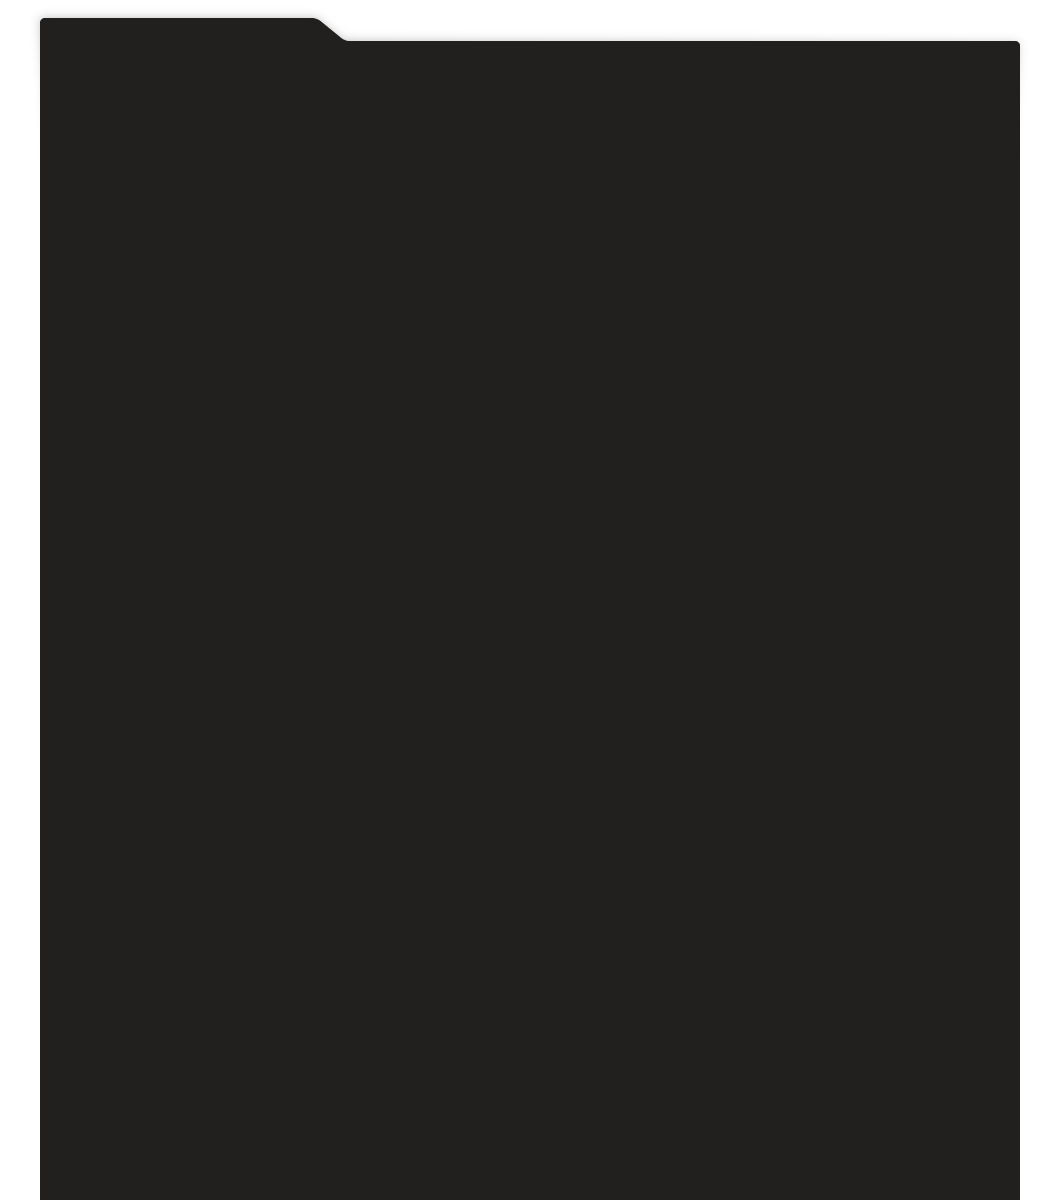
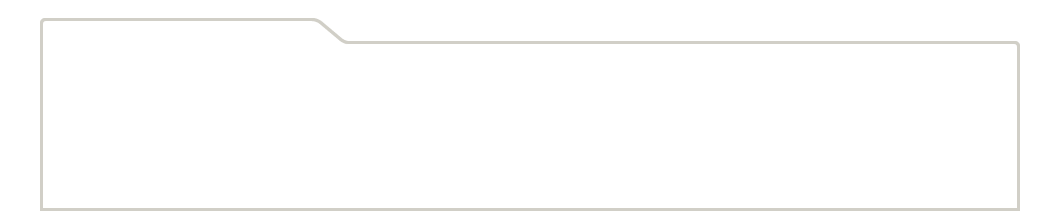
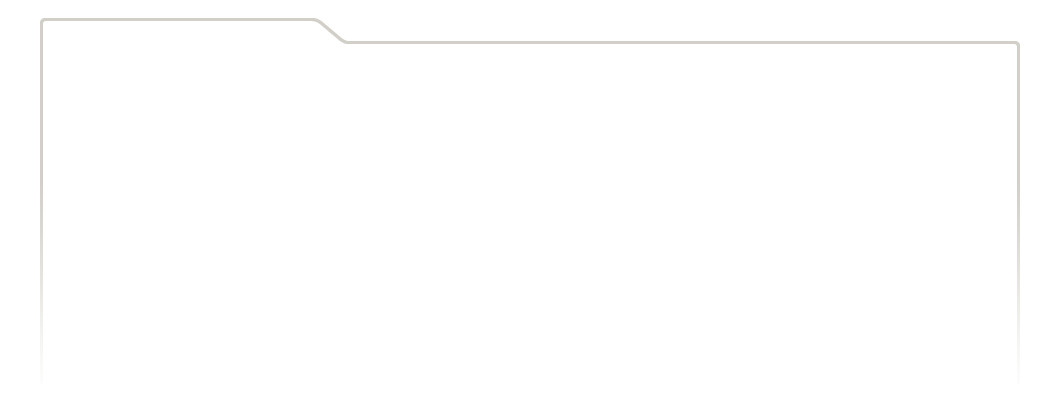
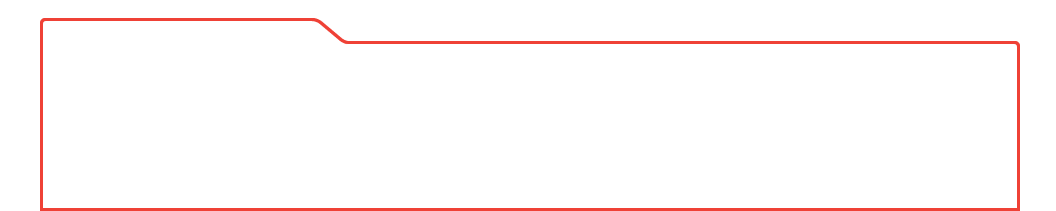
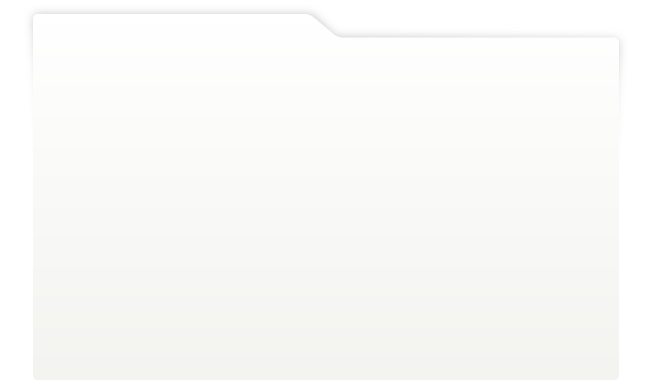
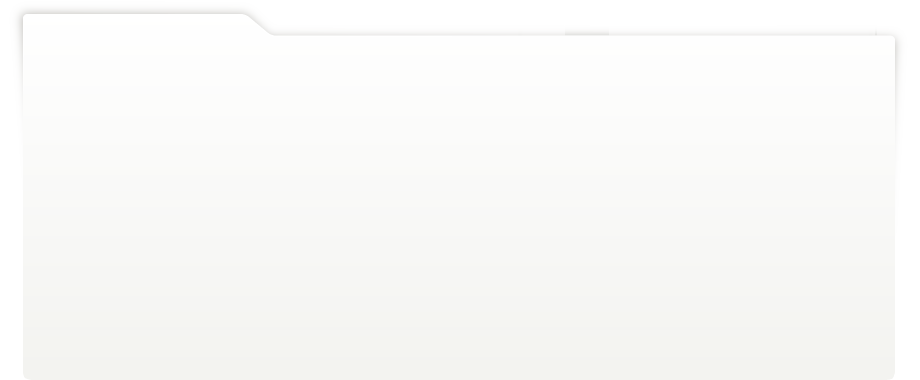
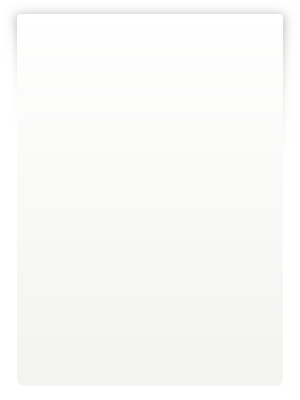
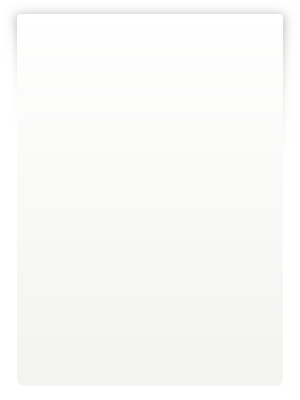
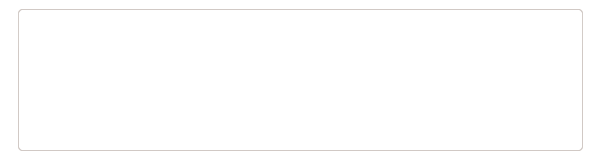
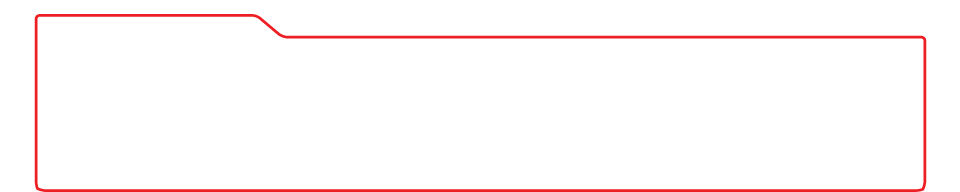
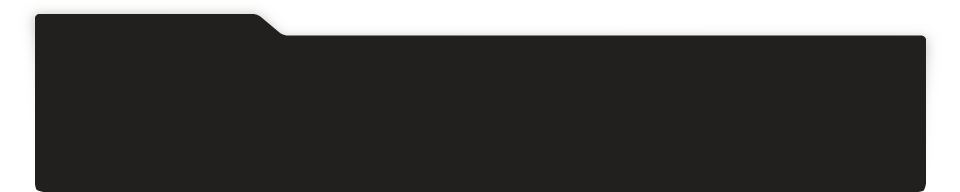
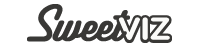
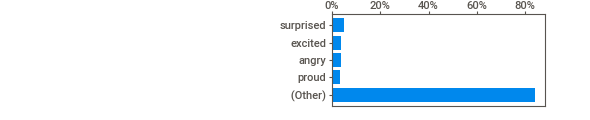
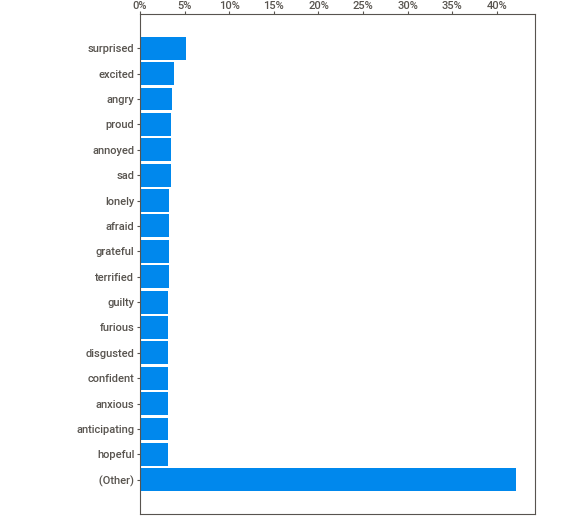
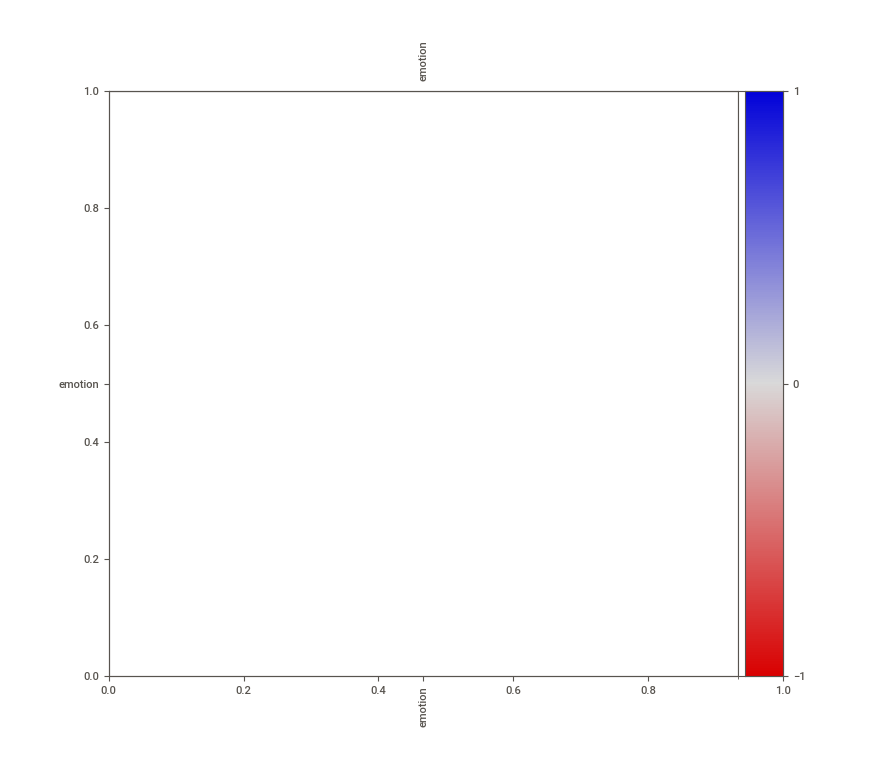
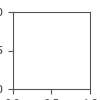

In [13]:
report = sv.analyze(df)
report.show_notebook()

### Yanxi's work for labeling emotions

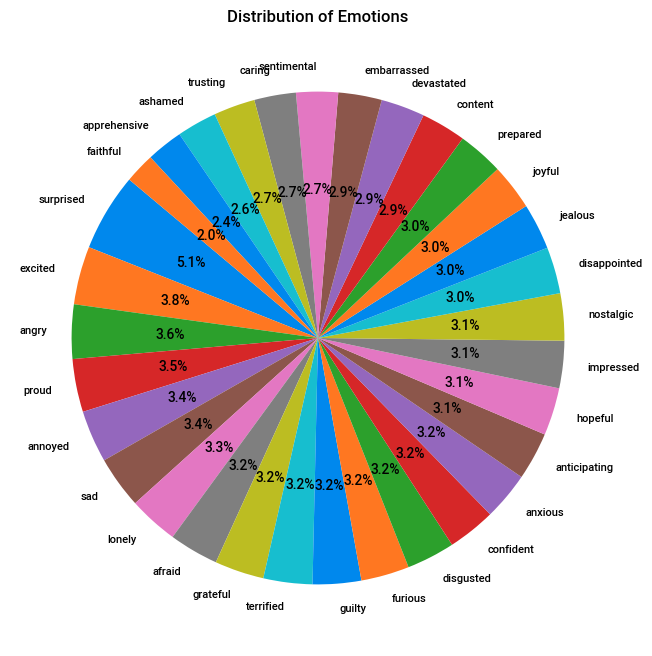

In [14]:
emotion_counts = df['emotion'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.show()

In [15]:
# Mapping emotions to their groups
emotion_mapping = {
    'surprised': 'excited',
    'joyful': 'excited',
    'terrified': 'afraid',
    'anxious': 'afraid',
    'apprehensive': 'afraid',
    'disgusted': 'disgusted',
    'embarrassed': 'disgusted',
    'guilty': 'disgusted',
    'ashamed': 'disgusted',
    'angry': 'annoyed',
    'annoyed': 'annoyed',
    'jealous': 'annoyed',
    'furious': 'annoyed',
    'faithful': 'grateful',
    'trusting': 'grateful',
    'grateful': 'grateful',
    'caring': 'grateful',
    'hopeful': 'grateful',
    'sad': 'disappointed',
    'disappointed': 'disappointed',
    'devastated': 'disappointed',
    'lonely': 'disappointed',
    'nostalgic': 'disappointed',
    'sentimental': 'disappointed',
    'proud': 'impressed',
    'impressed': 'impressed',
    'content': 'impressed',
    'anticipating': 'prepared',
    'prepared': 'prepared',
    'confident': 'prepared'
}
emotions = {}
df['grouped_emotion'] = df['emotion'].map(emotion_mapping)

In [16]:
group_counts = df['grouped_emotion'].value_counts()
print(group_counts)
print("total counts:", df['grouped_emotion'].shape[0])
df.dropna(inplace=True)

grouped_emotion
disappointed    11913
grateful         8913
annoyed          8509
disgusted        7635
impressed        6154
prepared         6000
afraid           5660
excited          5251
Name: count, dtype: int64
total counts: 64594


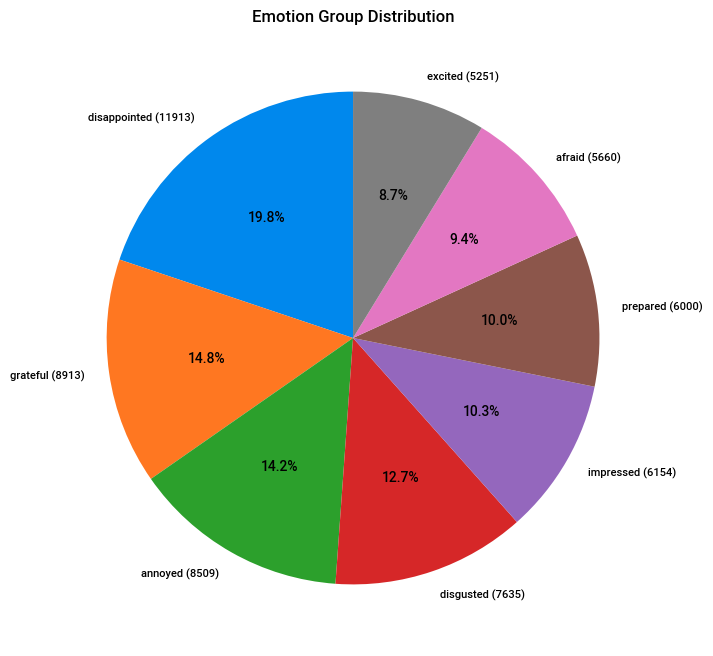

In [17]:
plt.figure(figsize=(8, 8))
group_counts.plot(kind='pie',labels=[f'{label} ({count})' for label, count in zip(group_counts.index, group_counts)], autopct='%1.1f%%', startangle=90)
plt.title('Emotion Group Distribution')
plt.ylabel('')  # Hide the y-axis label (unnecessary for pie chart)
plt.show()

### Simple data cleansing

In [18]:
df = df[['Situation', 'grouped_emotion', 'empathetic_dialogues', 'labels']]

In [19]:
for column in df.columns:
    min_length_row = df[column].str.len().idxmin() 
    print(f"Column '{column}' - Shortest entry: '{df[column][min_length_row]}'")

Column 'Situation' - Shortest entry: '1'
Column 'grouped_emotion' - Shortest entry: 'afraid'
Column 'empathetic_dialogues' - Shortest entry: '3'
Column 'labels' - Shortest entry: '4'


⭡ there are non proper elements like only number, so let's filter them out if they are less than 3 characters.

In [20]:
columns_to_check = ['Situation','grouped_emotion', 'empathetic_dialogues', 'labels']
mask = ~df.apply(lambda x: x.str.len() < 3).any(axis=1)
df = df[mask]

for column in df.columns:
    min_length_row = df[column].str.len().idxmin() 
    print(f"Column '{column}' - Shortest entry: '{df[column][min_length_row]}'")

Column 'Situation' - Shortest entry: 'Lies'
Column 'grouped_emotion' - Shortest entry: 'afraid'
Column 'empathetic_dialogues' - Shortest entry: 'Yes'
Column 'labels' - Shortest entry: 'Yes'


### EDA report again

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



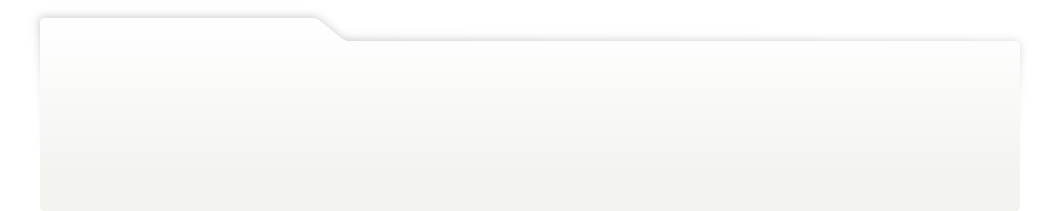
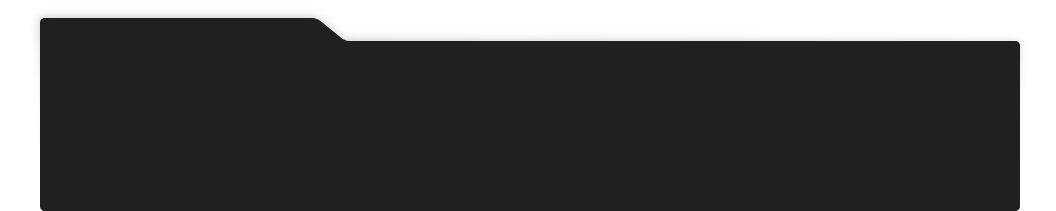
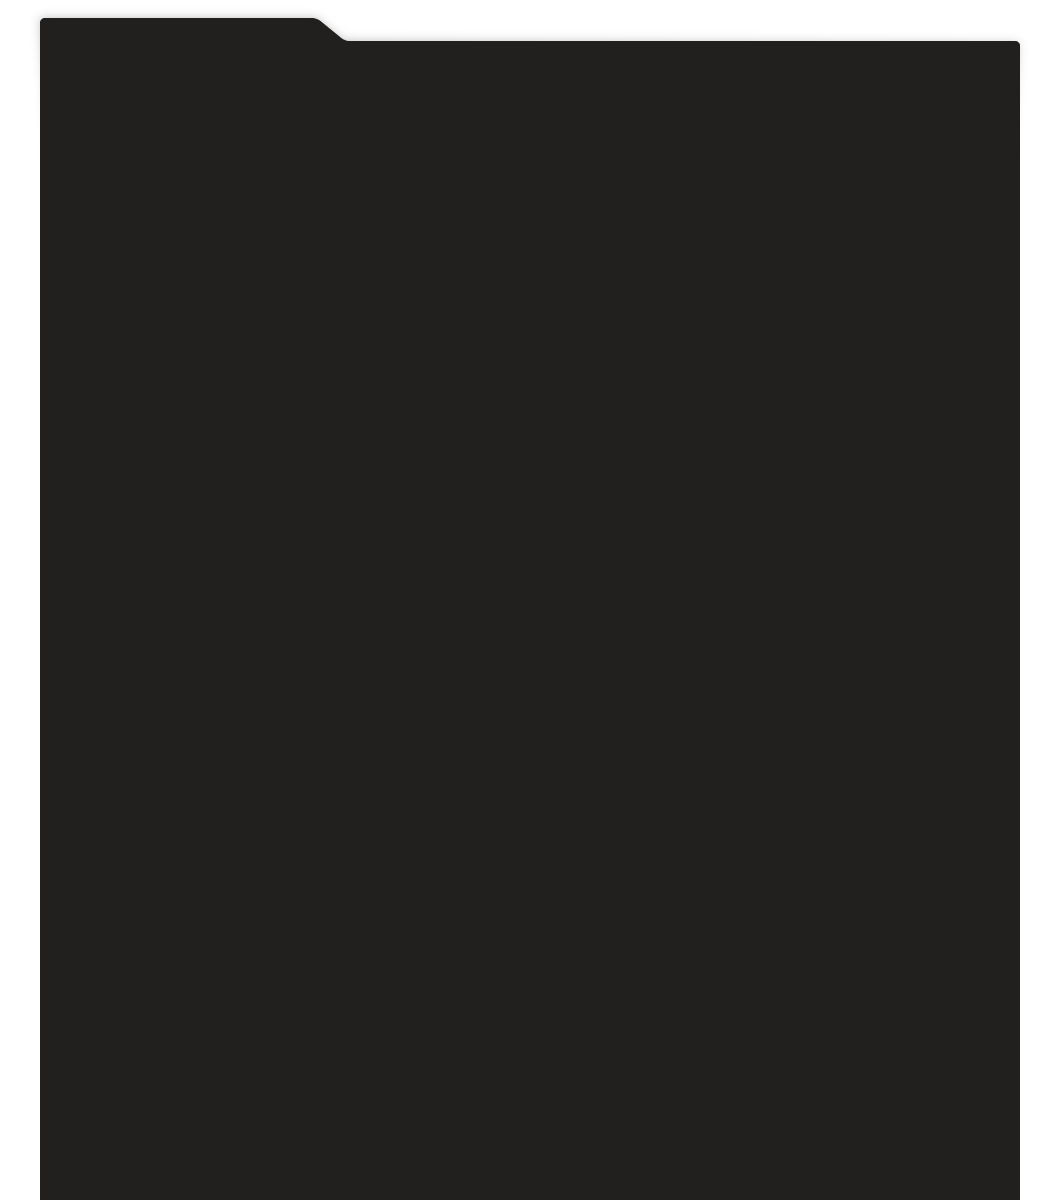
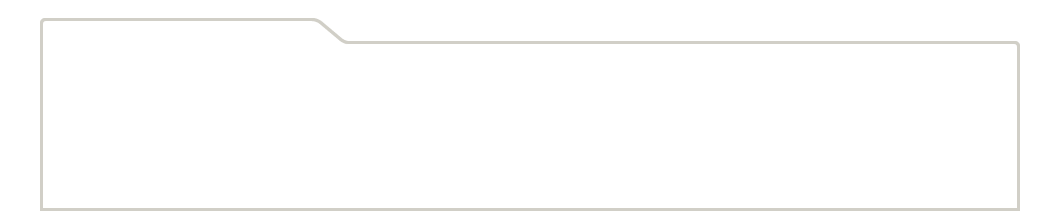
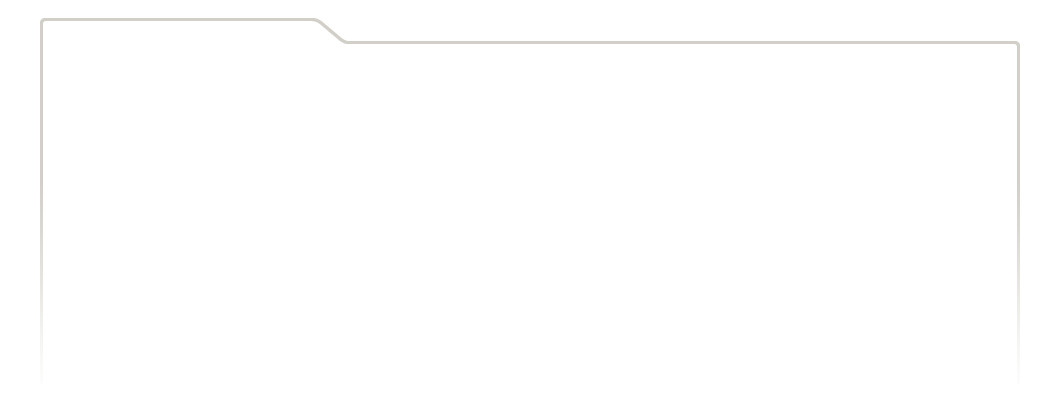
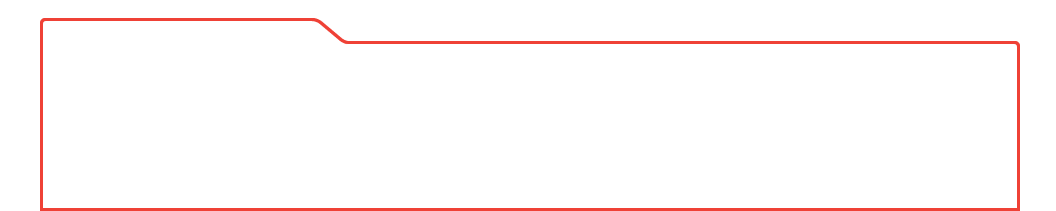
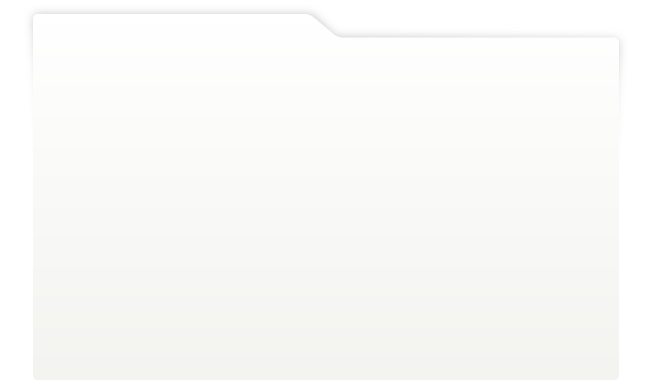
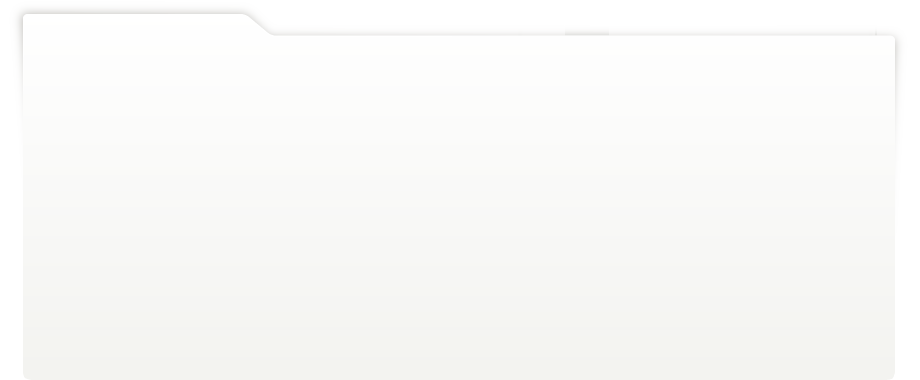
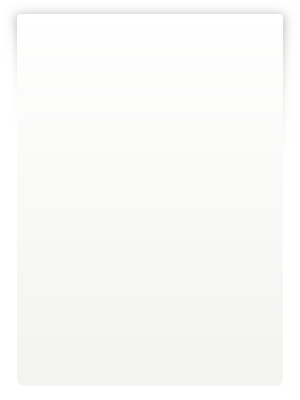
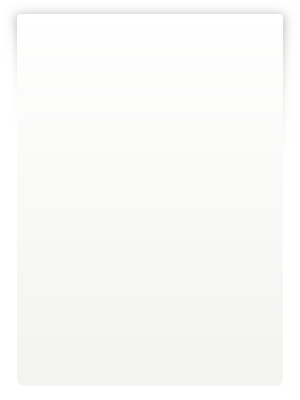
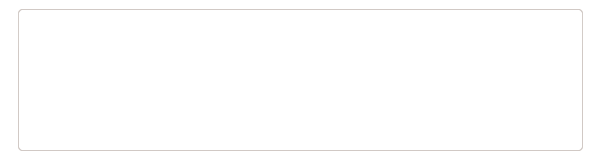
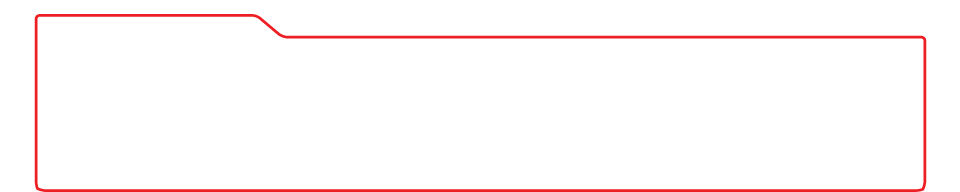
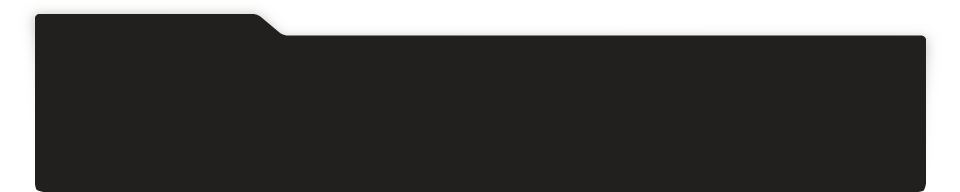
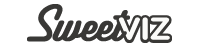
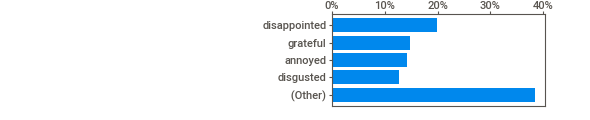
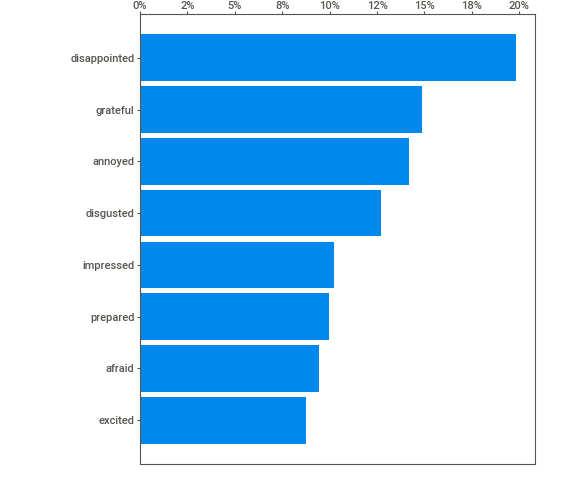
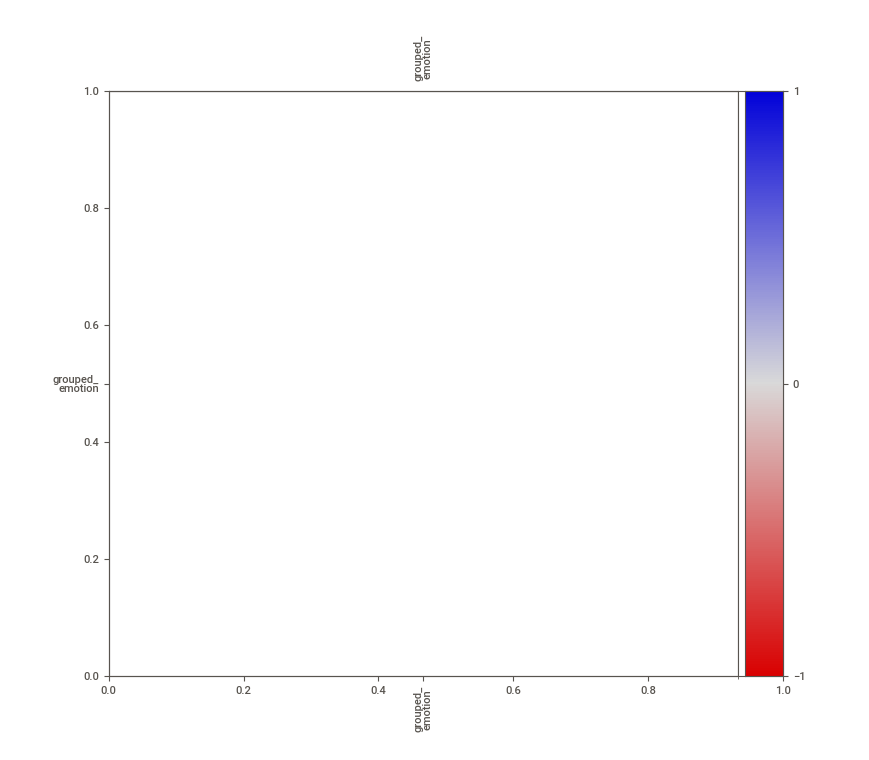
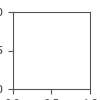

In [21]:
report = sv.analyze(df)
report.show_notebook()

### Visualization of length of sentences

#### 1. input: empathetic_dialogues

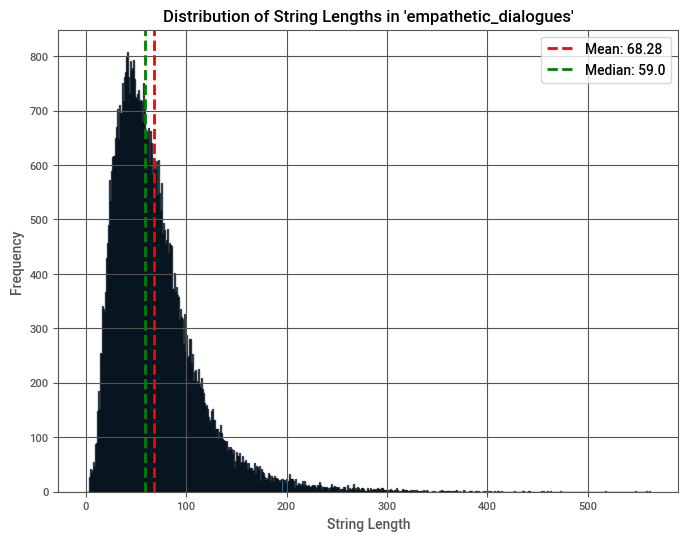

In [22]:
df['len_ed'] = df['empathetic_dialogues'].str.len()

mean_length = df['len_ed'].mean()
median_length = df['len_ed'].median()

plt.figure(figsize=(8, 6))
plt.hist(df['len_ed'], bins=range(1, df['len_ed'].max() + 2), edgecolor='black', alpha=0.7)

plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.title("Distribution of String Lengths in 'empathetic_dialogues'")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

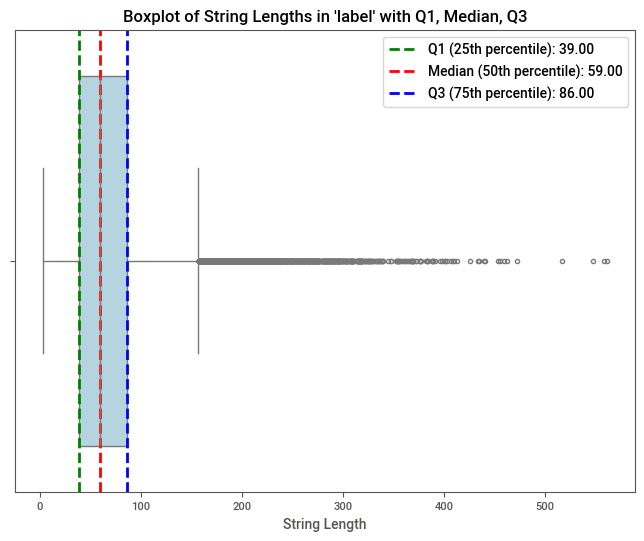

In [23]:
Q1 = df['len_ed'].quantile(0.25)
Q2 = df['len_ed'].quantile(0.50) 
Q3 = df['len_ed'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['len_ed'], color='lightblue')

plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

plt.title("Boxplot of String Lengths in 'label' with Q1, Median, Q3")
plt.xlabel("String Length")

plt.legend()
plt.show()

#### 2. output: labels

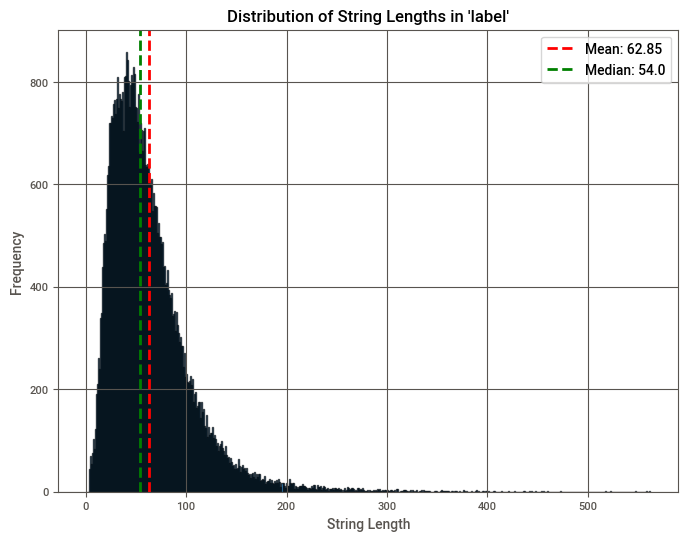

In [24]:
df['len_labels'] = df['labels'].str.len()

mean_length = df['len_labels'].mean()
median_length = df['len_labels'].median()

plt.figure(figsize=(8, 6))
plt.hist(df['len_labels'], bins=range(1, df['len_labels'].max() + 2), edgecolor='black', alpha=0.7)

plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.title("Distribution of String Lengths in 'label'")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

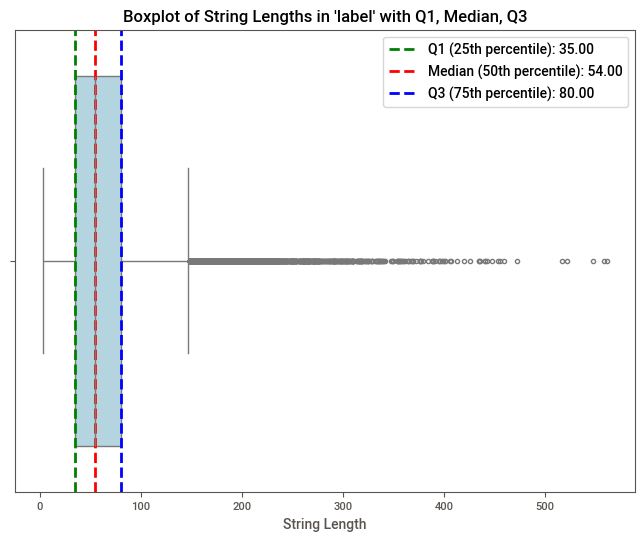

In [25]:
Q1 = df['len_labels'].quantile(0.25)
Q2 = df['len_labels'].quantile(0.50) 
Q3 = df['len_labels'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['len_labels'], color='lightblue')

plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

plt.title("Boxplot of String Lengths in 'label' with Q1, Median, Q3")
plt.xlabel("String Length")

plt.legend()
plt.show()

### Sentence analysis
+ Variety of the dataset is important
+ Compare similarity of the sentence/word use available API

1. Delete repeated sentencess
I noticed that the data was repeating itself, with the customer and agent switching each other

In [33]:
df.drop(['len_ed', 'len_labels'], axis=1, inplace=True)
df.head(10)

,Situation,grouped_emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,This was a best friend. I miss her.,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,We no longer talk.,Oh was this something that happened because of an argument?
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"Was this a friend you were in love with, or just a best friend?",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,Where has she gone?,We no longer talk.
10,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,Hi how are you doing today,doing good.. how about you
11,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,"Im good, trying to understand how someone can feel like hitting a blank wall when they see the darkness",it's quite strange that you didnt imagine it
12,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,doing good.. how about you,"Im good, trying to understand how someone can feel like hitting a blank wall when they see the darkness"
13,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,it's quite strange that you didnt imagine it,"i dont imagine feeling a lot, maybe your on to something"
14,I have always been loyal to my wife.,grateful,I have never cheated on my wife.,"And thats something you should never do, good on you."


In [34]:
print(df[['empathetic_dialogues', 'labels']][0:5])

                                                                                                                                                                                 empathetic_dialogues  \
0  I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.   
1                                                                                                                                                                 This was a best friend. I miss her.   
2                                                                                                                                                                                  We no longer talk.   
3                                                                                                                                     Was this a friend you were in love with, or just a best friend

In [35]:
df.tail(10)

,Situation,grouped_emotion,empathetic_dialogues,labels
64585,I am waiting to see if I pass my graduate exam and I am feeling this way.,prepared,I am waiting to see if I pass the GRE.,I hope you did it. Don't worry too much.
64586,I am waiting to see if I pass my graduate exam and I am feeling this way.,prepared,"Thank you, I am trying my best.",If you need to you can always take it again. Good luck!
64587,I am waiting to see if I pass my graduate exam and I am feeling this way.,prepared,I hope you did it. Don't worry too much.,"Thank you, I am trying my best."
64591,I found some pictures of my grandma in the attic last night,disappointed,I was going through the stuff in my attic last night,Did you find anything great?
64592,I found some pictures of my grandma in the attic last night,disappointed,Yeah I found some old pictures of when us kids used to go to my grandma's house for xmas,What a wonderful memory.
64593,I found some pictures of my grandma in the attic last night,disappointed,Did you find anything great?,Yeah I found some old pictures of when us kids used to go to my grandma's house for xmas
64594,I found some pictures of my grandma in the attic last night,disappointed,What a wonderful memory.,Yeah reminds me of the good old days. I miss my grandma. She passed away about 15 years ago.
64595,I woke up this morning to my wife telling me she was pregnant!,excited,I woke up this morning to my wife telling me she's pregnant!,Oh hey that's awesome! That is awesome right?
64596,I woke up this morning to my wife telling me she was pregnant!,excited,"It is soooo awesome. We have been wanting a baby for so long. I can't wait, but I was shocked out of a dead sleep!",That is awesome!!!! Congratulations!
64597,I woke up this morning to my wife telling me she was pregnant!,excited,Oh hey that's awesome! That is awesome right?,"It is soooo awesome. We have been wanting a baby for so long. I can't wait, but I was shocked out of a dead sleep!"


In [29]:
len(df)

59835

In [36]:
index_to_delete = []

for index, row in df.iterrows():
    if row['empathetic_dialogues'] in df['labels'][:index].values:
        index_to_delete.append(index)

duplicates = df.loc[index_to_delete]
duplicates_sorted = duplicates.sort_index()
duplicates

,Situation,grouped_emotion,empathetic_dialogues,labels
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"Was this a friend you were in love with, or just a best friend?",This was a best friend. I miss her.
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,Where has she gone?,We no longer talk.
11,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,"Im good, trying to understand how someone can feel like hitting a blank wall when they see the darkness",it's quite strange that you didnt imagine it
12,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,doing good.. how about you,"Im good, trying to understand how someone can feel like hitting a blank wall when they see the darkness"
13,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,it's quite strange that you didnt imagine it,"i dont imagine feeling a lot, maybe your on to something"
...,...,...,...,...
64587,I am waiting to see if I pass my graduate exam and I am feeling this way.,prepared,I hope you did it. Don't worry too much.,"Thank you, I am trying my best."
64592,I found some pictures of my grandma in the attic last night,disappointed,Yeah I found some old pictures of when us kids used to go to my grandma's house for xmas,What a wonderful memory.
64593,I found some pictures of my grandma in the attic last night,disappointed,Did you find anything great?,Yeah I found some old pictures of when us kids used to go to my grandma's house for xmas
64596,I woke up this morning to my wife telling me she was pregnant!,excited,"It is soooo awesome. We have been wanting a baby for so long. I can't wait, but I was shocked out of a dead sleep!",That is awesome!!!! Congratulations!


In [40]:
final_df = df[~df.isin(duplicates).all(axis=1)].reset_index(drop=True)
final_df

,Situation,grouped_emotion,empathetic_dialogues,labels
0,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.","Was this a friend you were in love with, or just a best friend?"
1,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,This was a best friend. I miss her.,Where has she gone?
2,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,We no longer talk.,Oh was this something that happened because of an argument?
3,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,Hi how are you doing today,doing good.. how about you
4,I have always been loyal to my wife.,grateful,I have never cheated on my wife.,"And thats something you should never do, good on you."
...,...,...,...,...
21488,I am waiting to see if I pass my graduate exam and I am feeling this way.,prepared,I am waiting to see if I pass the GRE.,I hope you did it. Don't worry too much.
21489,I am waiting to see if I pass my graduate exam and I am feeling this way.,prepared,"Thank you, I am trying my best.",If you need to you can always take it again. Good luck!
21490,I found some pictures of my grandma in the attic last night,disappointed,I was going through the stuff in my attic last night,Did you find anything great?
21491,I found some pictures of my grandma in the attic last night,disappointed,What a wonderful memory.,Yeah reminds me of the good old days. I miss my grandma. She passed away about 15 years ago.


2. Latent Dirichlet Allocation (LDA)
+ to extract topics within a set of documents. 

In [87]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


In [68]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jihyunryu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jihyunryu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jihyunryu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [88]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.lower() 
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # 불용어 제거
    return ' '.join(tokens)

In [89]:
final_df['cleaned_input'] = final_df['empathetic_dialogues'].apply(preprocess_text)
final_df['cleaned_output'] =final_df['labels'].apply(preprocess_text)

In [95]:
question = final_df['cleaned_input'].astype(str)
answer = final_df['cleaned_output'].astype(str)

In [96]:
processed_q = question.apply(preprocess)
processed_a = answer.apply(preprocess)

In [97]:
dictionary_q = corpora.Dictionary(processed_q)
dictionary_a = corpora.Dictionary(processed_a)

corpus_q = [dictionary_q.doc2bow(doc) for doc in processed_q]
corpus_a = [dictionary_a.doc2bow(doc) for doc in processed_a]

In [98]:
lda_model_q = LdaModel(corpus=corpus_q, id2word=dictionary_q, num_topics=5, passes=10, random_state=42)

for idx, topic in lda_model_q.print_topics(-1):
    print(f"Topic {idx}: {topic}")

lda_model_a = LdaModel(corpus=corpus_a, id2word=dictionary_a, num_topics=5, passes=10, random_state=42)

for idx, topic in lda_model_a.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.030*"im" + 0.021*"get" + 0.019*"work" + 0.017*"going" + 0.016*"job" + 0.015*"really" + 0.015*"school" + 0.014*"got" + 0.011*"go" + 0.009*"new"
Topic 1: 0.033*"last" + 0.023*"got" + 0.018*"car" + 0.017*"friend" + 0.016*"year" + 0.016*"night" + 0.014*"week" + 0.014*"new" + 0.013*"home" + 0.011*"someone"
Topic 2: 0.014*"good" + 0.014*"life" + 0.014*"love" + 0.010*"feel" + 0.009*"kid" + 0.008*"right" + 0.008*"yes" + 0.008*"used" + 0.008*"like" + 0.007*"much"
Topic 3: 0.020*"know" + 0.018*"dont" + 0.015*"like" + 0.015*"really" + 0.014*"im" + 0.011*"oh" + 0.011*"ive" + 0.010*"dog" + 0.010*"lot" + 0.009*"today"
Topic 4: 0.022*"old" + 0.019*"cant" + 0.017*"away" + 0.014*"found" + 0.012*"ago" + 0.012*"back" + 0.011*"looking" + 0.011*"believe" + 0.010*"wait" + 0.009*"years"
Topic 0: 0.072*"thats" + 0.042*"good" + 0.041*"oh" + 0.038*"must" + 0.028*"going" + 0.028*"great" + 0.027*"awesome" + 0.024*"happened" + 0.021*"wow" + 0.020*"feel"
Topic 1: 0.026*"think" + 0.024*"dont" + 0.024*"wou

**0. How can we interpret them?**
+ Topics don’t necessarily represent fixed categories but rather recurring patterns in the dataset.
  
**1. Input topics**
+ Topic 0
  + Top words: "im", "get", "work", "going", "job", "school".
  + Possible Theme: Daily routines, career, and education. 
  + This topic might reflect conversations about work, school, or personal plans.
+ Topic 1
  + Top words: "last", "got", "car", "friend", "year", "night".
  + Possible Theme: Social events and past experiences. 
  + The emphasis on "last", "got", "friend", and "year" suggests discussions about recent events, memories, or interactions with others.
+ Topic 2
  + Top words: "good", "life", "love", "feel", "kid".
  + Possible Theme: Emotional well-being and relationships. 
  + This topic may capture reflections on personal feelings, relationships (like "love" and "life"), and family (e.g., "kid").
+ Topic 3
  + Top words: "know", "dont", "like", "really", "dog", "today".
  + Possible Theme: General conversations or opinions. 
  + The presence of "know", "dont", and "like" suggests casual exchanges or personal commentary, potentially including pets or daily happenings ("dog", "today").
+ Topic 4
  + Top words: "old", "cant", "away", "found", "back", "believe".
  + Possible Theme: Reflections and transitions. 
  + This topic might involve discussions about change, age, or experiences from the past (e.g., "old", "ago", "back").

**2. Output topics**
+ Topic 0
  + Top words: "thats", "good", "oh", "must", "going", "great", "awesome", "happened", "wow", "feel".
  + Theme: Expressions of excitement or surprise.
    + The frequent use of words like "thats", "oh", "must", and "wow" suggests reactions to surprising or impressive events.
  + Positive descriptors like "good", "great", and "awesome" indicate a celebratory or affirming tone.
+ Topic 1
  + Top words: "think", "dont", "would", "something", "know", "like", "could", "way", "feel", "ive".
  + Theme: Contemplation or speculation.
    + This topic captures reflective or uncertain statements, as seen with "think", "dont", "would", and "could".
    + The presence of "feel" and "something" suggests introspection or abstract discussions.
+ Topic 2
  + Top words: "like", "nice", "sounds", "get", "time", "thats", "good", "go", "fun", "long".
  + Theme: Plans and enjoyment.
    + The words "nice", "sounds", "time", and "fun" indicate casual conversations about activities or experiences.
    + "Get", "go", and "long" suggest some focus on movement or time duration.
+ Topic 3
  + Top words: "oh", "im", "sorry", "hear", "sure", "hope", "glad", "really", "thing", "sad".
  + Theme: Sympathy or consolation.
    + The dominance of "oh" and "sorry" indicates empathetic responses.
    + Words like "hear", "sad", and "hope" reinforce a theme of concern or offering comfort.
+ Topic 4
  + Top words: "thats", "cool", "love", "pretty", "yes", "sweet", "haha", "lucky", "really", "kind".
  + Theme: Lighthearted admiration or positivity.
    + Words like "cool", "love", "sweet", and "haha" suggest a fun, easygoing tone.
    + "Lucky" and "pretty" hint at admiration or appreciation for situations or people.


In [99]:
lda_vis_q = gensimvis.prepare(lda_model_q, corpus_q, dictionary_q)
pyLDAvis.display(lda_vis_q)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

**What is the λ?**

+ λ = 1.0: Topic-centric interpretation
  + When you want to find topic-specific words: Set lambda close to 1.0 to see the most unique words in each topic.
+ λ = 0.0: dataset-wide frequency-centred interpretation
  + When you want to see the impact of common words: Setting lambda close to 0.0 reveals the most frequent words in the dataset overall. This gives you a sense of the overall nature of your data.
+ λ = 0.5 (intermediate value): Balanced interpretation of topic and overall frequency



In [107]:
lda_vis_a = gensimvis.prepare(lda_model_a, corpus_a, dictionary_a)
pyLDAvis.display(lda_vis_a)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

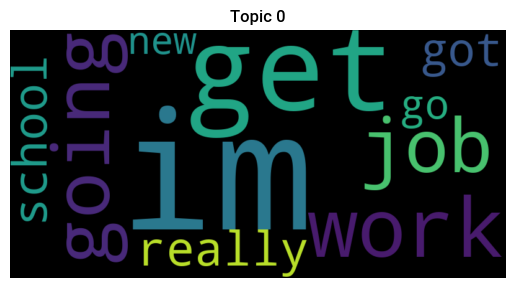

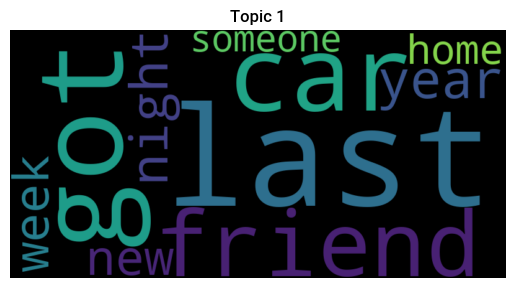

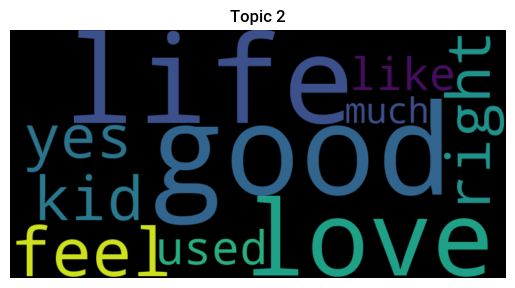

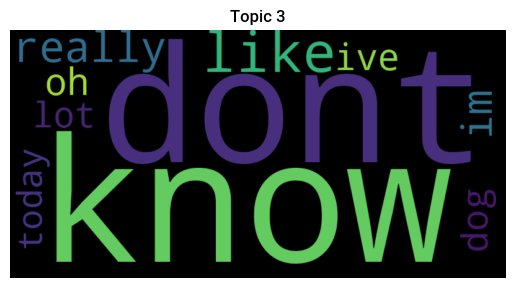

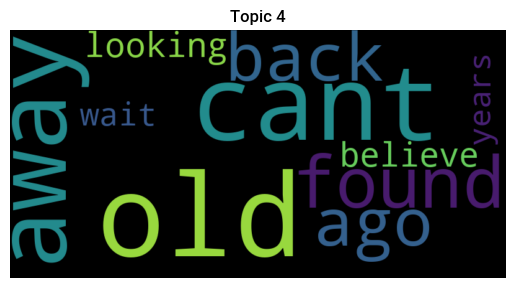

In [104]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for idx, topic in lda_model_q.show_topics(num_topics=5, formatted=False):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(topic))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()

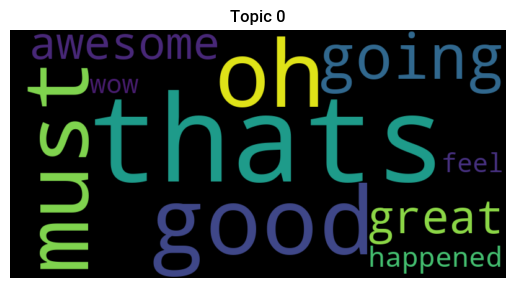

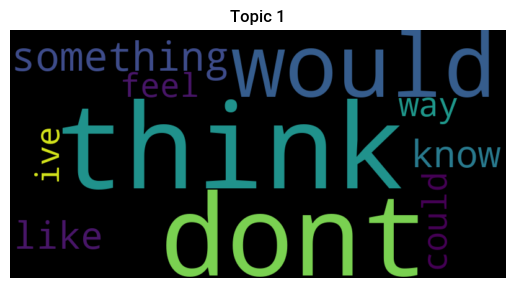

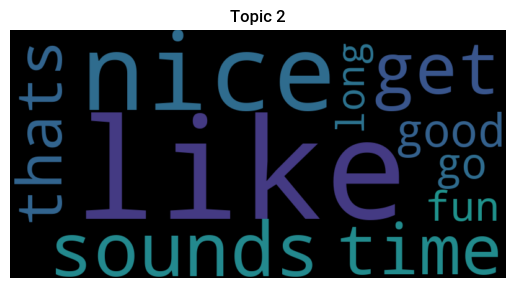

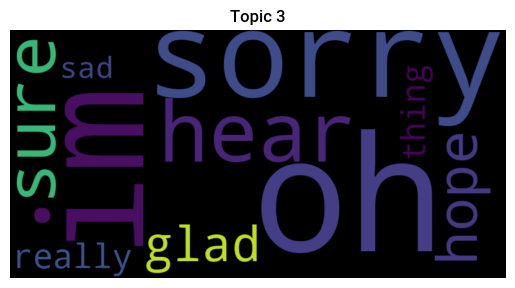

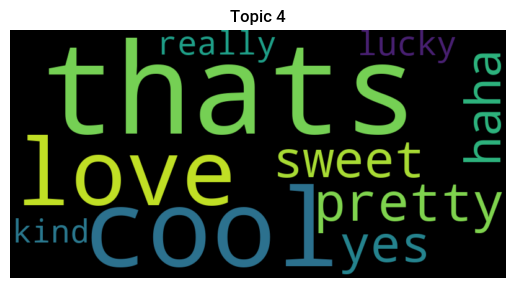

In [105]:
for idx, topic in lda_model_a.show_topics(num_topics=5, formatted=False):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(topic))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()

2. sentiment analysis
+ using `distilbert-base-uncased-finetuned-sst-2-english` from hugging face
+ 

In [79]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
question_sentiment = question.apply(lambda x: sentiment_analyzer(x)[0]['label'])
answer_sentiment = answer.apply(lambda x: sentiment_analyzer(x)[0]['label'])

KeyboardInterrupt: 

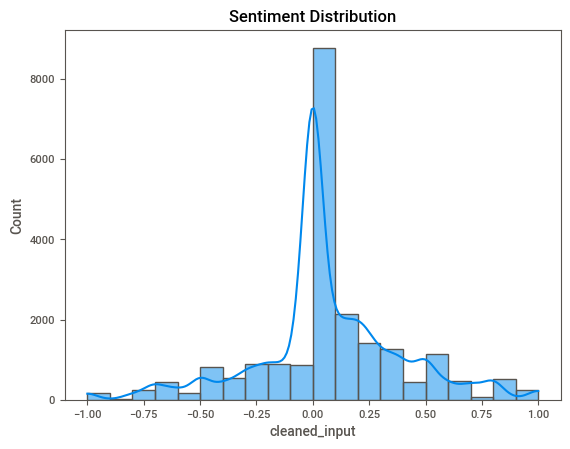

In [ ]:
from textblob import TextBlob
import seaborn as sns

input_sentiment = final_df['cleaned_input'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(input_sentiment, kde=True, bins=20)
plt.title('Sentiment Distribution')
plt.show()


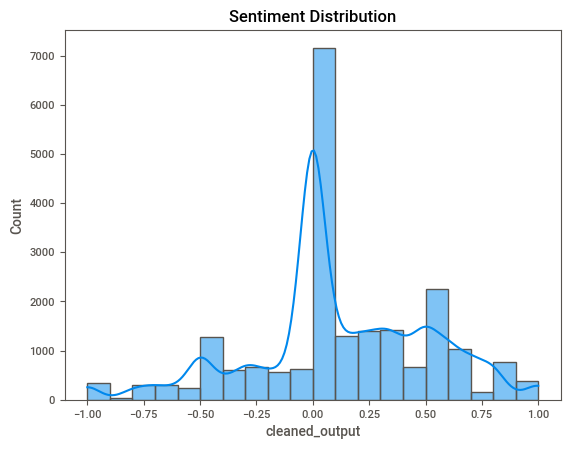

In [106]:
input_sentiment = final_df['cleaned_output'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(input_sentiment, kde=True, bins=20)
plt.title('Sentiment Distribution')
plt.show()

+ -1.0: very negative emotion | e.g. this is terrible
+ 0.0: Neutral emotion | e.g. it's okay
+ 1.0: Very positive emotion | e.g. this is amazing

### Save txt file

In [ ]:
def save_conversation_to_file(df, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        for _, row in df.iterrows():
            f.write(f"<bot> <bot> {row['empathetic_dialogues']} <endOfText>\n")
            f.write(f"<human> {row['labels']} <endOfText>\n")

output_file = '../../data/emotion.txt'
save_conversation_to_file(final_df, output_file)

In [90]:
# cleaned version
def save_conversation_to_file(df, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        for _, row in df.iterrows():
            f.write(f"<bot> <bot> {row['cleaned_input']} <endOfText>\n")
            f.write(f"<human> {row['cleaned_output']} <endOfText>\n")

output_file = '../../data/emotion_cleaned.txt'
save_conversation_to_file(final_df, output_file)